In [15]:
import numpy as np
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from matplotlib import style
from scipy import stats
from scipy.stats import shapiro
%matplotlib inline
import plotly.express as px
import os

In [13]:
df = pd.read_csv("data/CARS.csv")
df["MSRP"] = df["MSRP"].replace('[\$,]', '', regex=True).astype(float)
df["Invoice"] = df["Invoice"].replace('[\$,]', '', regex=True).astype(float)
df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


3.1.1 Para las variables categóricas un gráfico de barras. Categoría
numero de observaciones.

<Axes: xlabel='Make', ylabel='Count'>

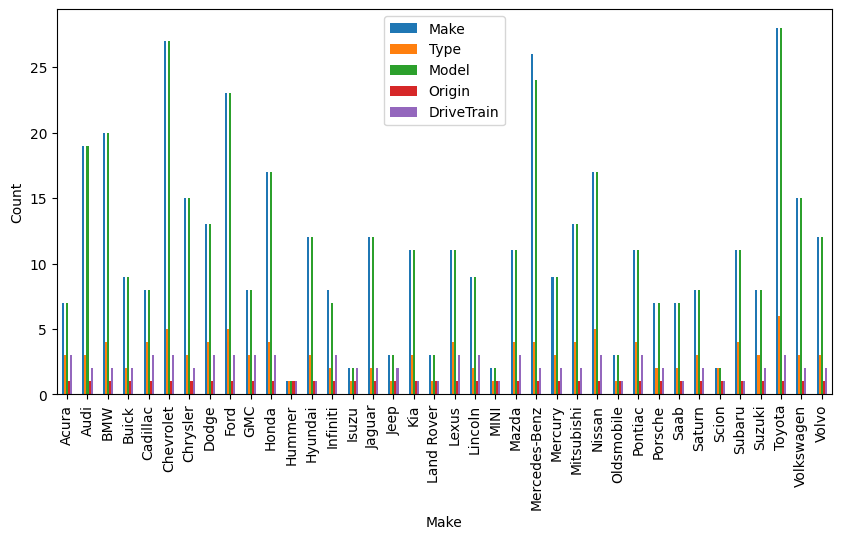

In [18]:
df[["Make","Model", "Type","Origin","DriveTrain", ]].groupby(["Make"]).agg({"Make":"count","Type":pd.Series.nunique,\
                                           "Model":pd.Series.nunique,"Type":pd.Series.nunique,\
                                           "Origin":pd.Series.nunique,"DriveTrain":pd.Series.nunique})\
.plot.bar(xlabel="Make", ylabel="Count", figsize=(10,5))

3.1.2 Para las variables numéricas crear histogramas. Listar los modelos
de carros que están más lejos de 5 estándares de desviación, y
serían considerados outliers. Hacer test de si es una distribución
normal o no.

<Axes: >

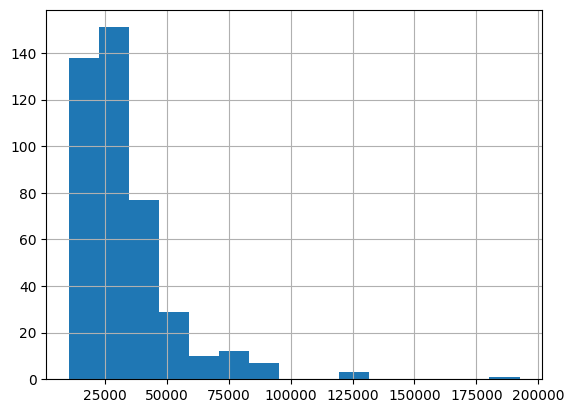

In [31]:
df["MSRP"].hist(bins=15)

<Axes: >

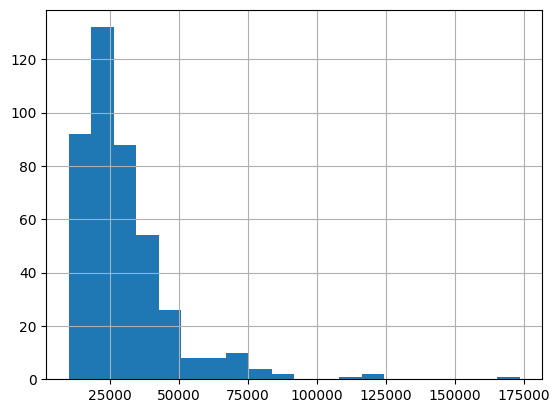

In [32]:
df["Invoice"].hist(bins=20)

<Axes: >

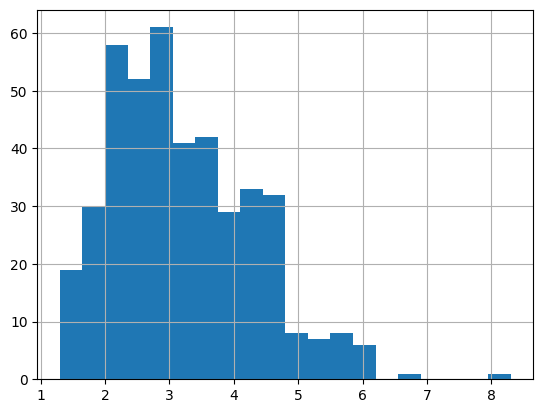

In [30]:
df["EngineSize"].hist(bins=20)

In [ ]:
df["Cylinders"].hist(bins=20)

In [ ]:
df["Horsepower"].hist(bins=20)

In [ ]:
df["MPG_City"].hist(bins=20)

In [ ]:
df["MPG_Highway"].hist(bins=20)

In [ ]:
df["Weight"].hist(bins=20)

In [ ]:
df["Wheelbase"].hist(bins=20)

In [ ]:
df["Length"].hist(bins=20)

In [22]:
df.query('MSRP > (32774.855140+(5*19431.716674)) or MSRP < (32774.855140-(5*19431.716674))')


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
334,Porsche,911 GT2 2dr,Sports,Europe,Rear,192465.0,173560.0,3.6,6.0,477,17,24,3131,93,175


In [ ]:
df.query('Invoice > (30014.700935+(5*17642.117750)) or Invoice < (30014.700935-(5*17642.117750))')

In [ ]:
df.query('EngineSize > (3.196729+(5*1.108595)) or EngineSize < (3.196729-(5*1.108595))')

In [ ]:
df.query('Cylinders > (5.807512+(5*1.558443)) or Cylinders < (5.807512-(5*1.558443))')

In [ ]:
df.query('Horsepower > (215.885514+(5*71.836032)) or Horsepower < (215.885514-(5*71.836032))')

In [ ]:
df.query('MPG_City > (20.060748+(5*5.238218)) or MPG_City < (20.060748-(5*5.238218))')

In [ ]:
df.query('MPG_Highway > (26.843458+(5*5.741201)) or MPG_Highway < (26.843458-(5*5.741201))')

In [ ]:
df.query('Weight > (3577.953271+(5*758.983215)) or Weight < (3577.953271-(5*758.983215))')

In [ ]:
df.query('Wheelbase > (108.154206+(5*8.311813)) or Wheelbase < (108.154206-(5*8.311813))')

In [ ]:
df.query('Length > (186.362150+(5*14.357991)) or Length < (186.362150-(5*14.357991))')

In [23]:
def test_normalidad(variable):
    k2, p =stats.normaltest(df[[variable]])
    alpha =1e-3
    if p > alpha:
        print("Es normal")
    else:
        print("No es normal")

In [25]:
test_normalidad("MSRP")
test_normalidad("Invoice")
test_normalidad("EngineSize")
test_normalidad("Cylinders")
test_normalidad("Horsepower")
test_normalidad("MPG_City")
test_normalidad("MPG_Highway")
test_normalidad("Weight")
test_normalidad("Wheelbase")
test_normalidad("Length")

No es normal
No es normal
No es normal
No es normal
No es normal
No es normal
No es normal
No es normal
No es normal
Es normal


3.2.1 Variables categóricas debes crear un boxplot. Explique cómo
interpreta el gráfico

In [27]:
px.box(df, x="MPG_City", y="Make")

In [33]:
px.box(df, x="MPG_City", y="Model")

In [ ]:
px.box(df, x="MPG_City", y="Type")

In [ ]:
px.box(df, x="MPG_City", y="Origin")

In [ ]:
px.box(df, x="MPG_City", y="DriveTrain")

3.2.2 Variables numéricas vas a crear un scatter plot.Explique cómo
interpreta el gráfico

In [28]:
px.scatter(df,x="MPG_City", y="MSRP")

In [ ]:
px.scatter(df,x="MPG_City", y="Invoice")

In [ ]:
px.scatter(df,x="MPG_City", y="EngineSize")

In [ ]:
px.scatter(df,x="MPG_City", y="Cylinders")

In [ ]:
px.scatter(df,x="MPG_City", y="Horsepower")

In [ ]:
px.scatter(df,x="MPG_City", y="MPG_Highway")

In [ ]:
px.scatter(df,x="MPG_City", y="Weight")

In [ ]:
px.scatter(df,x="MPG_City", y="Wheelbase")

In [ ]:
px.scatter(df,x="MPG_City", y="Length")

3.3.1 Cree la matriz de correlación, cuales son las variables más
importantes para explicar la variabilidad de MPG_City. Explique por
qué el coeficiente es negativo o positivo.

In [35]:
df[["MSRP","Invoice","EngineSize","Cylinders","Horsepower","MPG_City","MPG_Highway","Weight", "Wheelbase","Length"]].corr()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
MSRP,1.000000,0.999132,0.571753,0.649742,0.826945,-0.475020,-0.439622,0.448426,0.152000,0.172037
Invoice,0.999132,1.000000,0.564498,0.645226,0.823746,-0.470442,-0.434585,0.442332,0.148328,0.166586
EngineSize,0.571753,0.564498,1.000000,0.908002,0.787435,-0.709471,-0.717302,0.807867,0.636517,0.637448
Cylinders,0.649742,0.645226,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.826945,0.823746,0.787435,0.810341,1.000000,-0.676699,-0.647195,0.630796,0.387398,0.381554
MPG_City,-0.475020,-0.470442,-0.709471,-0.684402,-0.676699,1.000000,0.941021,-0.737966,-0.507284,-0.501526
MPG_Highway,-0.439622,-0.434585,-0.717302,-0.676100,-0.647195,0.941021,1.000000,-0.790989,-0.524661,-0.466092
Weight,0.448426,0.442332,0.807867,0.742209,0.630796,-0.737966,-0.790989,1.000000,0.760703,0.690021
Wheelbase,0.152000,0.148328,0.636517,0.546730,0.387398,-0.507284,-0.524661,0.760703,1.000000,0.889195
Length,0.172037,0.166586,0.637448,0.547783,0.381554,-0.501526,-0.466092,0.690021,0.889195,1.000000


Según el gráfico la que más correlación tiene es la MPG_Highway, varía linealmente de forma similar, los coeficientes pueden ser positivos o negativos según la relación de covarianza que tengan, si el coeficiente es positivo, las variables tienden a incrementarse juntas, si es negativo, una crece mientras que otra decrece.

3.3.2 Cree las dummy variables para todas las variables categóricas y
genere la matriz de correlación nuevamente. ¿Cuál es el valor de
variable categórica con mayor correlación?


In [39]:
dummies =pd.DataFrame(df[["Make","Type","Origin","DriveTrain"]])
dummy = pd.get_dummies(dummies[["Make","Type","Origin","DriveTrain"]])
dummy.corr()

,Make_Acura,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_Ford,Make_GMC,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
Make_Acura,1.000000,-0.027792,-0.028549,-0.018898,-0.017796,-0.033459,-0.024574,-0.022822,-0.030729,-0.017796,...,0.027029,0.011490,-0.031428,-0.035402,0.168563,-0.081886,-0.093264,-0.022631,0.048108,-0.033684
Make_Audi,-0.027792,1.000000,-0.047720,-0.031589,-0.029746,-0.055927,-0.041076,-0.038147,-0.051363,-0.029746,...,0.031875,0.065012,-0.052533,0.029691,-0.164878,0.339401,-0.155891,0.218596,-0.068914,-0.126765
Make_BMW,-0.028549,-0.047720,1.000000,-0.032449,-0.030557,-0.057451,-0.042194,-0.039186,-0.052762,-0.030557,...,0.017199,0.059463,-0.053963,-0.017425,-0.169368,0.348644,-0.160137,0.018889,-0.234187,0.249780
Make_Buick,-0.018898,-0.031589,-0.032449,1.000000,-0.020227,-0.038030,-0.027931,-0.025940,-0.034926,-0.020227,...,0.049818,-0.052698,-0.035721,-0.040238,-0.112114,-0.093072,0.202632,-0.037048,0.105939,-0.086198
Make_Cadillac,-0.017796,-0.029746,-0.030557,-0.020227,1.000000,-0.035812,-0.026302,-0.024427,-0.032889,-0.019048,...,-0.031766,0.004557,0.041347,-0.037891,-0.105576,-0.087644,0.190816,-0.030222,0.026806,-0.002214
Make_Chevrolet,-0.033459,-0.055927,-0.057451,-0.038030,-0.035812,1.000000,-0.049452,-0.045926,-0.061837,-0.035812,...,-0.030138,-0.032934,0.145619,-0.033598,-0.198498,-0.164783,0.358760,-0.018804,0.072057,-0.064642
Make_Chrysler,-0.024574,-0.041076,-0.042194,-0.027931,-0.026302,-0.049452,1.000000,-0.033730,-0.045416,-0.026302,...,0.099547,-0.028622,-0.046450,-0.002558,-0.145786,-0.121024,0.263491,-0.099723,0.129273,-0.053937
Make_Dodge,-0.022822,-0.038147,-0.039186,-0.025940,-0.024427,-0.045926,-0.033730,1.000000,-0.042178,-0.024427,...,0.001175,-0.020880,0.134392,-0.048592,-0.135392,-0.112396,0.244705,-0.026328,0.003696,0.020528
Make_Ford,-0.030729,-0.051363,-0.052762,-0.034926,-0.032889,-0.061837,-0.045416,-0.042178,1.000000,-0.032889,...,-0.065482,0.011937,0.077024,0.015740,-0.182298,-0.151335,0.329481,-0.023808,-0.003007,0.025816
Make_GMC,-0.017796,-0.029746,-0.030557,-0.020227,-0.019048,-0.035812,-0.026302,-0.024427,-0.032889,1.000000,...,-0.137982,-0.049625,0.266304,-0.037891,-0.105576,-0.087644,0.190816,0.053771,-0.076867,0.037265


3.3.3 Cree la matriz de correlación nuevamente removiendo todas los
modelos de carro que fueron catalogados como un outlier. (Puede
utilizar .query(‘Model in["MDX","TSX 4dr"]’ ). Existe alguna
variación en la correlación